### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

boston = load_boston()
data = boston.data
target = boston.target

feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

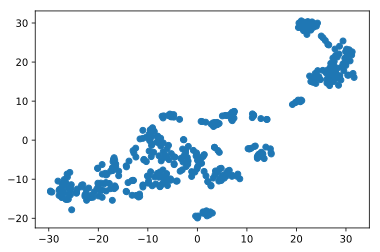

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


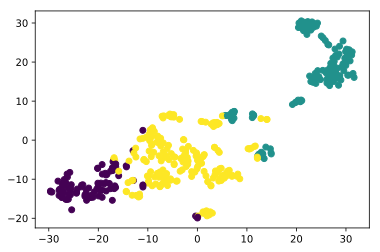

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [12]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [13]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

In [15]:
y_train.loc[labels_train==0, 'price'].mean()

27.788372093023252

In [16]:
y_train.loc[labels_train==1, 'price'].mean()

16.165354330708666

In [17]:
y_train.loc[labels_train==2, 'price'].mean()

24.958115183246072

### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [19]:
labels_test = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [20]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [21]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [22]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

In [23]:
y_test.loc[labels_test==0, 'price'].mean()

31.35

In [24]:
y_test.loc[labels_test==1, 'price'].mean()

16.437142857142856

In [25]:
y_test.loc[labels_test==2, 'price'].mean()

21.860784313725492